In [82]:
import numpy as np
import pandas as pd
import math as m
import sympy as sym
import random as rand
import matplotlib.pyplot as plt
import cmath as cm

In [83]:
# defininf the states
# defininsg coefficeients sybols

def Creating_states( coeff = [1/(2**.5),1/(2**.5),1/(2**.5),1/(2**.5)] , Abstract = False):    # coeff list like [a0,a1,b0,b1]
    if Abstract == True:
        a0 = sym.symbols('a0')
        a1 = sym.symbols('a1')
        b0 = sym.symbols('b0')
        b1 = sym.symbols('b1')
    else:
        a0 = coeff[0]
        a1 = coeff[1]
        b0 = coeff[2]
        b1 = coeff[3]
    psi0 = [a0,a1]      # defining states
    psi1 = [b0,b1]
    return([psi0,psi1])

In [84]:
initial_states = Creating_states(Abstract=False, coeff = [1/(2**.5),1/(2**.5),1,0])     # Creating the two states with these coefficients

psi0 = initial_states[0]
psi1 = initial_states[1]

psi0

[0.7071067811865475, 0.7071067811865475]

In [85]:
psi0sq = []
psi1sq = []
[[psi0sq.append(i*j) for i in psi0] for j in psi0]
[[psi1sq.append(i*j) for i in psi1] for j in psi1]   # creating list of coeff for squared states (intermeditate step)

psi0psi0 = [psi0sq[0], (psi0sq[1]**2+psi0sq[2]**2)**(.5), psi0sq[3]]        # the second element is the normalized coefficient due to the addition of states (01+10). See OneNote writeup for details
psi1psi1 = [psi1sq[0], (psi1sq[1]**(2)+psi1sq[2]**(2))**(.5), psi1sq[3]]            # symmetric states in basis (|00>, normalized version of (|01>+|10>),|11>)

# psi0psi0
# sum([i**2 for i in psi0psi0])   # adding to 1 now.

In [86]:
#creating the density matrix rho
# rho is 1/2*(|psi0psi0Xpsi0psi0|+|psi1psi1Xpsi1psi1|)
# findiing the conjugate vectors 

vec_psi0psi0 = np.array(psi0psi0)     # convertying to numpy arrays
vec_psi1psi1 = np.array(psi1psi1)

rho = (1/2)*(np.outer(vec_psi0psi0, vec_psi0psi0)+np.outer(vec_psi1psi1, vec_psi1psi1))       # density matrix with priors 1/2 each.

rho

array([[0.625    , 0.1767767, 0.125    ],
       [0.1767767, 0.25     , 0.1767767],
       [0.125    , 0.1767767, 0.125    ]])

In [87]:
# creating the SIC POVM matrices
w = m.e**((2/3)*m.pi*(1j))
POVM_vec = (1/(2**.5))*(np.array([[0,1,-1],[-1,0,1],[1,-1,0],[0,w,-w**2],[-1,0,w**2],[1,-w,0],[0,w**2,-w],[-1,0,w],[1,-w**2,0]]))  # an array of POVM direction vectors
POVM_elts = [(1/3)*np.outer(np.conjugate(POVM_vec[i]),POVM_vec[i]) for i in range(len(POVM_vec))]   # a list of POVM matrices

sum([np.trace(POVM_elts[i]) for i in range(9)])  # trace sum checks out NOPE !!!!!    
# POVM_elts[0]

(2.999999999999999+1.0928192876985672e-17j)

In [88]:
# prob_vec = [(POVM_elts[i]*rho).trace() for i in range(len(POVM_elts))]
prob_vec =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] #[(POVM_elts[i]*rho).trace() for i in range(len(POVM_elts))]
prob_vec = [i.real for i in prob_vec if abs(i.imag) < .01]          # cleaned up the trailing imaginary parts

# sum(prob_vec)        # prob not adding to 1?
# print(prob_vec)



In [89]:
N = 10000       # number of measurements  

POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']       # symbols to indicate collapsed direction
#prob distribution is simply the corresponding elements of the prob_vec
collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
pj_num_vec = [i/N for i in nj_vec]         # working
([i*N for i in prob_vec] , nj_vec)   # comparing the theoretical and experimental collapse probabilities


([35.74434901121032,
  833.3333333333333,
  869.0776823445435,
  919.6278254943937,
  1458.3333333333328,
  1752.961158827727,
  919.6278254943937,
  1458.3333333333326,
  1752.961158827727],
 [48, 824, 916, 941, 1532, 1692, 870, 1422, 1755])

In [90]:
M = [[np.trace(np.dot(POVM_elts[i],POVM_elts[j])) for i in range(len(POVM_elts))] for j in range(len(POVM_elts))]     # creating M matrix using POVM definition



In [91]:
u_0 = [1/3 for i in range(9)]           # cerating u_0 vector, to create the inverse matrix
M_inv = 3*np.outer(u_0,u_0) + 12*(np.eye(9) - np.outer(u_0,u_0))        # creating the inverse matrix
# np.trace(np.dot(M,M_inv))       # gives identity, checks out
r_vec = np.dot(M_inv,pj_num_vec)


In [99]:
rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
# [i for i in rho_num_list]

In [93]:
rho_num = np.zeros_like(rho_num_list[0])

# Loop over the matrices and sum them element-wise
for matrix in rho_num_list:
    rho_num = np.add(rho_num, matrix)

rho_num   

array([[0.6282+0.00000000e+00j, 0.1615+1.09119201e-02j,
        0.1306+1.90525589e-02j],
       [0.1615-1.09119201e-02j, 0.2444+3.17557704e-18j,
        0.1715-1.22975607e-02j],
       [0.1306-1.90525589e-02j, 0.1715+1.22975607e-02j,
        0.1274+1.88057882e-18j]])

In [94]:
rho # printing the theoretical density matrix and below the numerically reconstructed one
del_rho = rho_num-rho  # defining the difference of numberical and theoretical state
del_rho

array([[ 0.0032   +0.00000000e+00j, -0.0152767+1.09119201e-02j,
         0.0056   +1.90525589e-02j],
       [-0.0152767-1.09119201e-02j, -0.0056   +3.17557704e-18j,
        -0.0052767-1.22975607e-02j],
       [ 0.0056   -1.90525589e-02j, -0.0052767+1.22975607e-02j,
         0.0024   +1.88057882e-18j]])

In [97]:
eigenvalues, eigenvectors = np.linalg.eig(del_rho)  # each COLUMN is the corresponding eigenvector and not the row. eigenvectors[:,0]
# eigenvectors[:,0]   # eigenvector correspoding to the first eigenvalue
evals = np.array([i.real for i in eigenvalues if abs(i.imag)< .001])
norm_del_rho = max([abs(i) for i in evals])     # picking out the largest magnitude evalue

# evals   Working till here

array([ 0.0344285 , -0.02499692, -0.00943158])

In [101]:
#Creating function 

def experiment(N= 1000 , coeff = [1,0,0,1], priors = [.5,.5]):
    initial_states = Creating_states(Abstract=False, coeff = coeff)     # Creating the two states with these coefficients
    psi0 = initial_states[0]
    psi1 = initial_states[1]    # created the states to be discriminated

    psi0sq = []
    psi1sq = []
    [[psi0sq.append(i*j) for i in psi0] for j in psi0]
    [[psi1sq.append(i*j) for i in psi1] for j in psi1]   
    psi0psi0 = [psi0sq[0], (psi0sq[1]**2+psi0sq[2]**2)**(.5), psi0sq[3]]    
    psi1psi1 = [psi1sq[0], (psi1sq[1]**(2)+psi1sq[2]**(2))**(.5), psi1sq[3]]    # creating square states
    
    vec_psi0psi0 = np.array(psi0psi0)     
    vec_psi1psi1 = np.array(psi1psi1)
    rho = priors[0]*np.outer(vec_psi0psi0, vec_psi0psi0)+ priors[1]*np.outer(vec_psi1psi1, vec_psi1psi1)     # theoretical density matrix with priors 1/2 each.

    prob_vec =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] 
    prob_vec = [i.real for i in prob_vec if abs(i.imag) < .01]          # cleaned up theoretical prob vector

    POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']      # symbols to indicate collapsed direction
    #prob distribution is simply the corresponding elements of the prob_vec
    collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

    nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
    pj_num_vec = [i/N for i in nj_vec]                                  # numerical prob vector     
    
    r_vec = np.dot(M_inv,pj_num_vec)
    
    # constructing the rho numrical using the r_vector etc.
    rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
    rho_num = np.zeros_like(rho_num_list[0])
    for matrix in rho_num_list:
        rho_num = np.add(rho_num, matrix)       # created the numerical rho
    
    del_rho = rho_num-rho 
    
    eigenvalues, eigenvectors = np.linalg.eig(del_rho)  # each COLUMN is the corresponding eigenvector and not the row. eigenvectors[:,0]
    # eigenvectors[:,0]   # eigenvector correspoding to the first eigenvalue
    evals = np.array([i.real for i in eigenvalues if abs(i.imag)< .001])
    norm_del_rho = max([abs(i) for i in evals])     # picking out the largest magnitude evalue
    error = norm_del_rho

    return [eigenvalues, error]



[array([ 0.24943497-7.61124205e-18j, -0.06040072-2.89602669e-19j,
        -0.18903425-5.97694309e-18j]),
 0.24943497248219848]

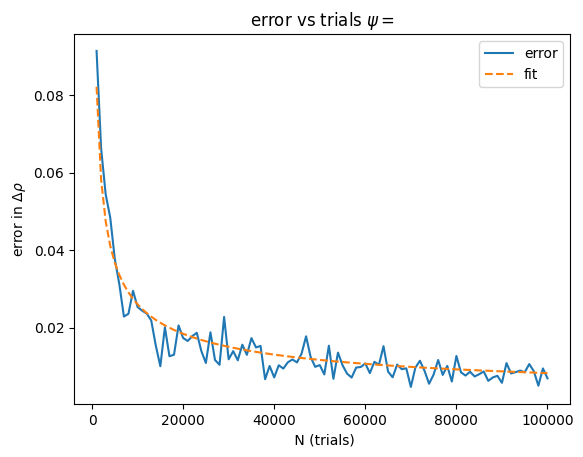

In [130]:
trials = [1000*(i+1) for i in range(100)]

sqrtN  = [2.6/(i**.5) for i in trials]     # ideal square root shape with a constant multiplied for scaling
errors = [experiment(i)[1] for i in trials]

plt.plot(trials, errors, label=r'error')
plt.plot(trials ,sqrtN, "--", label=r'fit')
plt.xlabel(' N (trials)')
plt.ylabel(r'error in $\Delta \rho $')
plt.title(r'error vs trials $\psi = $')
plt.legend()

plt.show()